# VISUALIZATION - part 1

We will practice visualization with Python and the Plotly library. It is the reference library today with Seaborn.

It allows you to create interactive graphics easily and integrates perfectly with a jupyter notebook.

Today's lab will take place in three stages:
- Study the different graphs possible in data analysis
- Create simple visualizations with the Plotly library to familiarize yourself with the syntax
- Build the graphic representations that we will use to create a restaurant dashboard.

## 1) Which graph to choose?

Explore this [website](https://www.data-to-viz.com/#area), it gives a very good overview of the different types of graphs that are possible to make when analyzing data. It gives detailed explanations of each representation with interpretation errors to avoid.

Depending on the situation, suggest a type of graph that would be relevant to produce:

a) We want to observe the distribution of a numerical variable to know its extreme values.

 Histogramm or a density Chart ( 
 with seaborn
 # library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# Make default density plot
sns.kdeplot(df['sepal_width'])

b) We want to represent the evolution of the composition of a financial portfolio over time. The portfolio is the sum of several assets.

evolution over time:
=> boxplot

c) We want to observe the relationship between two numeric variables.
The idea is to be able to decide whether there is a correlation link or not.

Is it the same graph if we want to observe the correlation links between several numerical variables?

graph

## 2) Practice visualization with Plotly

Before practicing Plotly Express, let's first manipulate graphical objects. They are the basis of everything and allow you to customize simple graphics by adding representations.

a) Import the following libraries.

In [1]:
import numpy as np
from collections import Counter

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

b) Using the alias go, create a new figure called `fig`. Check the [docs](https://plotly.com/python/creating-and-updating-figures/) if you need some guidance!

In [9]:
# create a graphic object with graph_object alias go
fig = go.Figure()

fig.show()

b) Create a first graphical object of type Scatter which will be a simple line between points A(2, 7) and B(3, 8). Store this object in a `first_line_object` variable.

In [8]:
trace1 = go.Scatter(x=[2, 7], y=[3, 8])

title = go.layout.Title(text="First graphical object of type Scatter which will be a simple line between points A(2, 7) and B(3, 8)")

# configure graph with data and title
first_line_object = go.Figure(
    data = trace1,
    layout = go.Layout(title= title))

#show the object with command show()
first_line_object.show()
 # to complete

c) Add this variable to your figure using the add_trace() method then visualize the result with the show() method.

In [ ]:
# to complete

In [4]:
# Add a trace to the figure
fig.add_trace(trace1)

You could also, in a more concise way, use this syntax directly:
```python
go.Figure(go.Scatter(x=[2, 3], y=[7, 8], mode="lines")).show()
```

In [5]:
go.Figure(go.Scatter(x=[2, 3], y=[7, 8], mode="lines")).show()

d) The graphical objects allow to make very complex graphics by adding multiple graphical objects, but the writing is a bit heavy.

This is why the Plotly Express library was developed to save time and flexibility when handling DataFrames. It's always best to use Plotly Express first and if that's not enough to achieve what you want then use graphical objects.

Make the same graph as before but with the `line` function of Plotly Express.

In [ ]:
fig = # to complete
fig.show()

In [6]:
#df = pd.read_csv('./Tiller_order_data.csv', low_memory=False)
d = {'x': [2, 3], 'y': [7, 8]}

# by default the x axis is the row index.
df = pd.DataFrame(data=d).set_index('x')

fig = px.line(df)
fig.show()

e) Attention the documentation is not the same between Plotly and Plotly express.
For example, there is no `go.Line`, only `go.Scatter`.

Study the documentation of the Plotly Express line function, and more precisely the 'markers' argument, and modify your graph by making a dot line (in addition to the line of circles on the points).
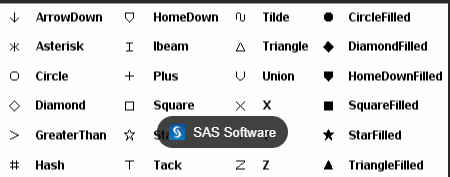

In [ ]:
fig = px.line(x=[2, 3], y=[7, 8], # to complete)
fig.show()

In [30]:
#df = pd.read_csv('./Tiller_order_data.csv', low_memory=False)
d = {'x': [2, 3], 'y': [7, 8]}

# by default the x axis is the row index.
df = pd.DataFrame(data=d).set_index('x')
fig = px.line(df,markers=True ,symbol=['square', 'circle'], width=800, height=400)


fig.show()

f) Let's see Plotly Express in action now.

Consider the example given in the Plotly Express documentation.

Run the following code and look at the data. What do they represent?
time recording of region specific properties like life expectations, population...

In [31]:
df = px.data.gapminder()
df.head(1)


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4


g) Using the `bar` function, represent in the form of a bar chart the evolution of French life expectancy over time.

In [ ]:
fig = px.bar(# to complete,
             x=# to complete,
             y=# to complete,
             title="LifeExpectancy over time in France")
fig.show()

In [32]:
mask = df['country'] == 'France'
# by default the x axis is the row index.
df_france = df.loc[mask]

fig = px.bar(df_france,
             x = df_france.year,
             y = df_france.lifeExp,
             title="LifeExpectancy over time in France")
fig.show()

h) We want to make the same graph for the countries France, Germany and Poland.

Look at the documentation to achieve 3 bar charts per year. Different colors will be used between countries.

barmode: str (default `'relative'`)
    One of `'group'`, `'overlay'` or `'relative'` In `'relative'` mode,
    bars are stacked above zero for positive values and below zero for
    negative values. In `'overlay'` mode, bars are drawn on top of one
    another. In `'group'` mode, bars are placed beside each other.
    
color: str or int or Series or array-like
    Either a name of a column in `data_frame`, or a pandas Series or
    array_like object. Values from this column or array_like are used to
    assign color to marks.

In [ ]:
fig = px.bar(# to complete,
             x=# to complete,
             y=# to complete,
             color=# to complete,
             barmode=# to complete,
             title="LifeExpectancy over time in France, Germany and Poland")
fig.show()

In [33]:
mask = df.country.isin(['Fance', 'Germany', 'Poland'])
df[mask].head()


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
564,Germany,Europe,1952,67.5,69145952,7144.114393,DEU,276
565,Germany,Europe,1957,69.1,71019069,10187.826650,DEU,276
566,Germany,Europe,1962,70.3,73739117,12902.462910,DEU,276
567,Germany,Europe,1967,70.8,76368453,14745.625610,DEU,276
568,Germany,Europe,1972,71.0,78717088,18016.180270,DEU,276


In [34]:
mask = df.country.isin(['France', 'Germany', 'Poland'])
# by default the x axis is the row index.
df_filter = df.loc[mask]
#configure bar chart
fig = px.bar(df_filter,
             x='year',
             y='lifeExp',
             color='country',
             barmode='group',
             title="LifeExpectancy over time in France, Germany and Poland")
# show chart
fig.show()

i) We decide to change the representation by using line plots rather than bar plots.

Modify the code to achieve this. Practical, no?



In [35]:
fig = px.line(df_filter, x='year', y= 'lifeExp', color='country'  )
fig.show()

j) Sizes, colors are dimensions that can be used to add more information to a chart.

Represent for the year 2007 only, the **relation** (find the right graph to visualize the links of correlations) between the variables `gfpPercap` (PIP per capita) and `lifeExp` with colors differentiated by continent and a size of points proportional to the size of the population of the country concerned.

We can set the `size_max` argument to 60 to enlarge the points while keeping the same proportions.

In [36]:
df.head(1)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4


In [37]:
fig = # to complete
fig.show()

SyntaxError: invalid syntax (3772128667.py, line 1)

In [38]:
df.loc[df['year']=='2007']

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num


In [39]:
mask = df.year == 2007
fig = px.scatter(df[mask], x = 'lifeExp', y='gdpPercap')

fig.show()

k) A lot of information represented, but there is no country information...

Looking at the documentation, add the country information when hovering over a circle with the mouse.

In [40]:
mask = df.year == 2007
fig = px.scatter(df[mask], x = 'lifeExp', y='gdpPercap', color='country')
fig.show()

l) The previous graph only represents the year 2007, how to represent all the years?

One of the solutions is to use yet another new dimension: the temporal dimension by creating an animation.
Look at the documentation and add the year as an animation (remember to pass the whole dataframe and not just the years of 2007...).

By default the limits on each axis are calculated for the first year, you can set a given window using the `range_x` and `range_y` arguments...
help:
animation_frame: str or int or Series or array-like
    Either a name of a column in `data_frame`, or a pandas Series or
    array_like object. Values from this column or array_like are used to
    assign marks to animation frames.
animation_group: str or int or Series or array-like
    Either a name of a column in `data_frame`, or a pandas Series or
    array_like object. Values from this column or array_like are used to
    provide object-constancy across animation frames: rows with matching
    `animation_group`s will be treated as if they describe the same object
    in each frame.
    
range_x: list of two numbers
    If provided, overrides auto-scaling on the x-axis in cartesian
    coordinates.
range_y: list of two numbers
    If provided, overrides auto-scaling on the y-axis in cartesian
    coordinates.

In [156]:
fig = px.scatter(df,
                 x = 'gdpPercap',
                 y='lifeExp',
                 color='country',
                 #animation_group= 'country',
                 animation_frame= 'year',
                range_x= [0,60000],
                range_y= [0,100])
fig.show()

## 3) Creation of visualizations for Restorative Dashboard

a) We are going to take the data from the previous lab. If needed, you can download them again at [this address](https://drive.google.com/file/d/1X5uXVFrl7SuMUKe7CJaiCmGEOhokorh2/view?usp=sharing).

b) Run the following data preprocessing code.

In [42]:
df = pd.read_csv("Tiller_order_data.csv")

# Transform dates into datetime format
df["date_opened"] = pd.to_datetime(df["date_opened"])
df["date_closed"] = pd.to_datetime(df["date_closed"])

# Index the order opening date
df = df.set_index(df["date_opened"])

C:\Users\p.nguyen\AppData\Local\Temp\ipykernel_1904\598011978.py:1: DtypeWarning:

Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.



c) Create the variable `id_store` equal to 8052 and another variable df_store which will contain only the orders data of this restaurant.

In [ ]:
id_store = # to complete
df_store = # to complete

In [43]:
id_store = 8052
mask = df.id_store.isin([id_store])
df_store = df[mask]
df_store

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price
date_opened,,,,,,,,,,,,,,,,,
2019-01-12 13:02:17+00:00,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17+00:00,2019-01-12 19:58:38+00:00,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5
2019-01-16 19:39:09+00:00,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09+00:00,2019-01-16 22:10:50+00:00,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8
2019-01-12 14:18:46+00:00,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46+00:00,2019-01-12 19:50:32+00:00,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4
2019-01-24 17:49:12+00:00,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12+00:00,2019-01-24 21:58:59+00:00,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0
2019-01-12 15:25:06+00:00,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06+00:00,2019-01-12 19:21:03+00:00,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-30 18:37:22+00:00,74971534,8052,184594.0,NaN,NaN,DB9A25CC-2795-4422-A727-A8413E294ADB,16813.0,2019-05-30 18:37:22+00:00,2019-05-30 21:25:16+00:00,NaN,CLOSED,1,NaN,Tiller iPAD,2,67.9,67.9
2019-06-15 20:09:20+00:00,77608930,8052,184585.0,NaN,NaN,0AA9FD2F-12F7-4122-BD28-30F749AC43A9,16813.0,2019-06-15 20:09:20+00:00,2019-06-15 22:03:33+00:00,NaN,CLOSED,1,NaN,Tiller iPAD,7,69.5,69.5
2020-10-25 15:59:30+00:00,148433200,8052,184594.0,16199.0,NaN,B4EC15CD-59F3-4D20-A837-CBAB113FEEAE,16813.0,2020-10-25 15:59:30+00:00,2020-10-25 19:05:47+00:00,B9,CLOSED,1,NaN,tiller-order,8,81.0,81.0


### Shop turnover

a) In a new variable `df_revenue`, calculate per day the turnover made by the restaurant (the sum of 'm_cached_payed').

We will only keep orders whose status is "CLOSED".

Remember to use the resample function seen in the previous lesson.

In [44]:
mask = df_store.dim_status == 'CLOSED'
df_revenue = df_store[mask].resample('D')['m_cached_payed'].sum().reset_index()
df_revenue

,date_opened,m_cached_payed
0,2019-01-01 00:00:00+00:00,164.0
1,2019-01-02 00:00:00+00:00,199.7
2,2019-01-03 00:00:00+00:00,111.9
3,2019-01-04 00:00:00+00:00,524.5
4,2019-01-05 00:00:00+00:00,1091.0
...,...,...
663,2020-10-25 00:00:00+00:00,932.6
664,2020-10-26 00:00:00+00:00,0.0
665,2020-10-27 00:00:00+00:00,0.0
666,2020-10-28 00:00:00+00:00,501.7


c) By choosing the Plotly graph of your choice, represent the evolution of the restaurant's income over time.

N.B. the dates are in the index, no need to specify the argument x or pass the index of the DataFrame `df` to it.

In [59]:
title = "Turnover store id"+ str(id_store)
fig = px.line(df_revenue,
              x='date_opened',
              y='m_cached_payed', 
              markers='dot',
              title=title)

# fig = px.box(df_revenue,
#               x='date_opened',
#               y='m_cached_payed', 
#               title=title)

fig.show()

In [60]:
fig = px.scatter(df_revenue,x='date_opened', y='m_cached_payed')
fig.show()

d) On what days is the restaurant closed?
0: Monday
1: Tuesday
2: Wednesday
3: Thursday
4: Friday
5: Saturday
6: Sunday

In [61]:
date = df_revenue[df_revenue['m_cached_payed']==0]['date_opened'].dt.weekday.reset_index()
date

,index,date_opened
0,5,6
1,6,0
2,12,6
3,13,0
4,19,6
...,...,...
281,658,1
282,659,2
283,660,3
284,664,0


e) As seen earlier, it is possible to add options to the graphs.

Using the `update_xaxes` method of the figure and the 'tickformat' argument, change the date format of the x-axis.

We want to have the dates with the following format **23/01/2020**.
We can look at the possible options at [this address](https://github.com/d3/d3-time-format)

%Y: Year with century as a decimal number (e.g., 2023)
%y: Year without century as a zero-padded decimal number (e.g., 23)
%m: Month as a zero-padded decimal number (e.g., 01 for January)
%d: Day of the month as a zero-padded decimal number (e.g., 01 for the 1st day)
%H: Hour (24-hour clock) as a zero-padded decimal number (e.g., 02 for 2 AM)
%I: Hour (12-hour clock) as a zero-padded decimal number (e.g., 02 for 2 AM)
%M: Minute as a zero-padded decimal number (e.., 05)
%S: Second as a zero-padded decimal number (e.g., 09)
%A: Weekday as the full name (e.g., Sunday)
%a: Weekday as an abbreviation (e.g., Sun)
%B: Month as the full name (e.g., January)
%b or %h: Month as an abbreviation (e.g., Jan)


In [ ]:
fig.update_xaxes(tickformat=# to complete)
fig.show()

In [62]:
fig.update_xaxes(tickformat="%d/%m/%Y")
fig.show()

f) It is also possible to add interactive elements to our first graph.

Look at the following code, what does it do when added to a chart?
Use it to check it.

In [63]:
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

g) Deduce how to add the option to see the last 7 days.

In [65]:
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            # to complete
            dict(count=7, label="7d", step="day", stepmode="backward"), #<--- added
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

### Number of customers per day

a) In a new variable `df_nb_customer`, calculate the number of customers per day in the restaurant (the sum of 'm_nb_customer').

We will only keep orders whose status is "CLOSED".

Remember to use the resample function seen in the previous lesson.

In [94]:
# all orders 
df_nb_customer = df_store.m_nb_customer.resample('D').sum().reset_index()
df_nb_customer

,date_opened,m_nb_customer
0,2019-01-01 00:00:00+00:00,12
1,2019-01-02 00:00:00+00:00,20
2,2019-01-03 00:00:00+00:00,14
3,2019-01-04 00:00:00+00:00,29
4,2019-01-05 00:00:00+00:00,67
...,...,...
663,2020-10-25 00:00:00+00:00,48
664,2020-10-26 00:00:00+00:00,0
665,2020-10-27 00:00:00+00:00,0
666,2020-10-28 00:00:00+00:00,34


b) Using the same logic as before, display the number of orders over time.

In [95]:
# to complete
df_nb_orders = df_store.id_order.resample('D').count().reset_index()
df_nb_orders


,date_opened,id_order
0,2019-01-01 00:00:00+00:00,5
1,2019-01-02 00:00:00+00:00,4
2,2019-01-03 00:00:00+00:00,6
3,2019-01-04 00:00:00+00:00,18
4,2019-01-05 00:00:00+00:00,17
...,...,...
663,2020-10-25 00:00:00+00:00,12
664,2020-10-26 00:00:00+00:00,0
665,2020-10-27 00:00:00+00:00,0
666,2020-10-28 00:00:00+00:00,9


c) Using the revenue per day information previously created, create a new variable that will contain the ratio between `df_revenue` and `df_nb_customer`.

What is this calculation for?

In [ ]:
df_average_basket = # to complete

df_average_basket

In [96]:
#show revenue
df_revenue

,date_opened,m_cached_payed
0,2019-01-01 00:00:00+00:00,164.0
1,2019-01-02 00:00:00+00:00,199.7
2,2019-01-03 00:00:00+00:00,111.9
3,2019-01-04 00:00:00+00:00,524.5
4,2019-01-05 00:00:00+00:00,1091.0
...,...,...
663,2020-10-25 00:00:00+00:00,932.6
664,2020-10-26 00:00:00+00:00,0.0
665,2020-10-27 00:00:00+00:00,0.0
666,2020-10-28 00:00:00+00:00,501.7


In [97]:
# show number of customers
df_nb_customer

,date_opened,m_nb_customer
0,2019-01-01 00:00:00+00:00,12
1,2019-01-02 00:00:00+00:00,20
2,2019-01-03 00:00:00+00:00,14
3,2019-01-04 00:00:00+00:00,29
4,2019-01-05 00:00:00+00:00,67
...,...,...
663,2020-10-25 00:00:00+00:00,48
664,2020-10-26 00:00:00+00:00,0
665,2020-10-27 00:00:00+00:00,0
666,2020-10-28 00:00:00+00:00,34


In [98]:
# merge both dataframes on 'date_opened'
df_average_basket = df_nb_customer.merge(df_revenue, on='date_opened')
#create new col with 'avg_basket'
df_average_basket['avg_basket'] = df_average_basket.m_cached_payed / df_average_basket.m_nb_customer

df_average_basket

,date_opened,m_nb_customer,m_cached_payed,avg_basket
0,2019-01-01 00:00:00+00:00,12,164.0,13.666667
1,2019-01-02 00:00:00+00:00,20,199.7,9.985000
2,2019-01-03 00:00:00+00:00,14,111.9,7.992857
3,2019-01-04 00:00:00+00:00,29,524.5,18.086207
4,2019-01-05 00:00:00+00:00,67,1091.0,16.283582
...,...,...,...,...
663,2020-10-25 00:00:00+00:00,48,932.6,19.429167
664,2020-10-26 00:00:00+00:00,0,0.0,NaN
665,2020-10-27 00:00:00+00:00,0,0.0,NaN
666,2020-10-28 00:00:00+00:00,34,501.7,14.755882


d) Create a graphical object of type Scatter (not Plotly Express) which represents the average basket over time.

View it and use the "mode" argument to change the representation to "lines" mode and the "line_color" argument to choose the color in hex (eg #000000 for black)

In [118]:
fig_bask_avg = go.Scatter(x=df_average_basket.date_opened,
                              y=df_average_basket.avg_basket,
                              name="Average basket",
                              mode='lines',
                              line_color='pink')

fig = go.Figure()
fig.add_trace(fig_bask_avg)
fig_nb_customers = go.Scatter(x=df_average_basket.date_opened,
                              y=df_average_basket.m_nb_customer,
                              name="nb_customers",
                              mode='lines',
                              line_color='black')
fig.add_trace(fig_nb_customers)
fig.show()



e) We are now going to add to the graph of the number of daily customers the information of the average basket.

To do this, use the `add_trace` method and pass the graphical object created previously as a parameter.

In [125]:
fig_nb_customers = go.Scatter(x=df_average_basket.date_opened,
                              y=df_average_basket.m_nb_customer,
                              name="nb_customers",
                              mode='lines',
                              line_color='black')
fig.add_trace(fig_nb_customers)
fig.show()

### Top waiter

a) Replace null values ​​in `id_waiter` column with "Unknown"

In [126]:
df_store.id_waiter = df_store.id_waiter.fillna('Unknown')

df_store.head(1)
# df_store

C:\Users\p.nguyen\AppData\Local\Temp\ipykernel_1904\1009464814.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price
date_opened,,,,,,,,,,,,,,,,,
2019-01-12 13:02:17+00:00,55538867,8052,NaN,Unknown,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17+00:00,2019-01-12 19:58:38+00:00,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5


b) Create a DataFrame `df_waiter` of two columns id_waiter, m_cached_paid which calculates the total of m_cached_paid made by each of the servers.

In [127]:
df_waiter = df_store.groupby('id_waiter')['m_cached_payed'].sum().reset_index(name='m_cash')
df_waiter

,id_waiter,m_cash
0,16199.0,33103.56
1,Unknown,294655.29


c) Represent the result in the form of a pie chart.

In [128]:
fig = px.pie(
    df_waiter,
    names='id_waiter',
    values='m_cash',
    color='id_waiter',
    title = 'Distribution of orders by a server'
)
fig.show()

d) By studying the documentation of the `update_traces` method, display in addition to the percentage, the total turnover achieved.

In [129]:
# to complete
fig.update_traces(textinfo='value+percent')
fig.show()

## 4) [Bonus] Study the Seaborn Library

Seaborn is a great visualization library but it is not interactive.

Study its syntax from the [examples gallery](https://seaborn.pydata.org/examples/index.html).

Is it really different from that of Plotly Express?

In [130]:
import seaborn as s

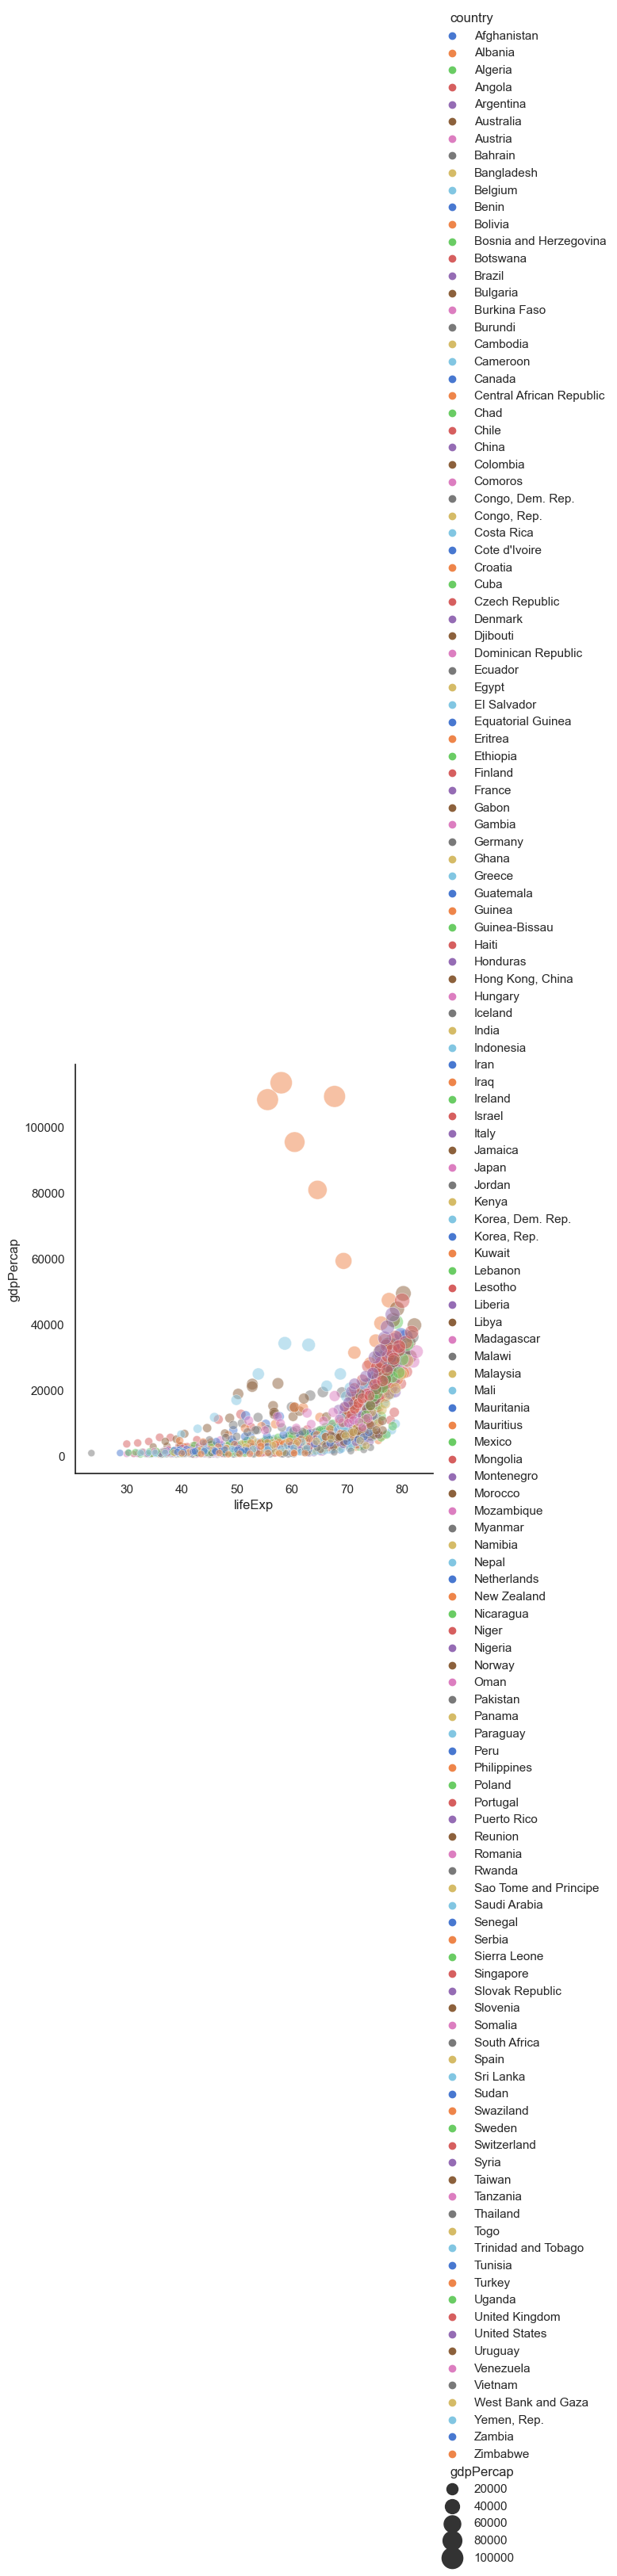

In [149]:
sns.set_theme(style="white")

# Load the example mpg dataset
df = px.data.gapminder()

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="lifeExp", y="gdpPercap", hue="country", size="gdpPercap",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

In [142]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [134]:
df

,id_order,id_store,id_table,id_waiter,id_customer,id_external,id_device,date_opened,date_closed,dim_name,dim_status,dim_type,dim_comment,dim_source,m_nb_customer,m_cached_payed,m_cached_price
date_opened,,,,,,,,,,,,,,,,,
2019-01-12 13:02:17+00:00,55538867,8052,NaN,NaN,NaN,0425716B-EFF4-41CA-AEA1-839104F36833,15327.0,2019-01-12 13:02:17+00:00,2019-01-12 19:58:38+00:00,vincent,CLOSED,1,NaN,Tiller iPAD,1,45.5,45.5
2019-01-16 19:39:09+00:00,56035309,8052,NaN,NaN,NaN,75E41FE2-64FF-41D3-954C-A7DE4AA887EF,15327.0,2019-01-16 19:39:09+00:00,2019-01-16 22:10:50+00:00,frere et soeur avec pierre,CLOSED,1,NaN,Tiller iPAD,2,49.8,49.8
2019-01-12 14:18:46+00:00,55550051,8052,NaN,NaN,NaN,F6051A05-C9AC-4033-BF72-BB5149B8F439,15327.0,2019-01-12 14:18:46+00:00,2019-01-12 19:50:32+00:00,rachel,CLOSED,1,NaN,Tiller iPAD,1,27.4,27.4
2019-01-24 17:49:12+00:00,57000119,8052,NaN,16199.0,NaN,B8BEEC66-1C10-48A0-B4D5-035CB5EEFE62,15327.0,2019-01-24 17:49:12+00:00,2019-01-24 21:58:59+00:00,Groupe PEL,CLOSED,1,NaN,tiller-order,3,60.0,60.0
2019-01-12 15:25:06+00:00,55558817,8052,NaN,NaN,NaN,17F0533C-2FF1-4FC5-A50D-12704C7B7A4B,15327.0,2019-01-12 15:25:06+00:00,2019-01-12 19:21:03+00:00,remi et date,CLOSED,1,NaN,Tiller iPAD,2,39.9,39.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-28 13:13:21+00:00,61630471,4542,NaN,NaN,NaN,C4A0AFD8-FBD7-4740-A48B-4890F46E43E2,7411.0,2019-02-28 13:13:21+00:00,2019-02-28 13:38:45+00:00,NaN,CLOSED,1,NaN,Tiller iPAD,1,23.0,23.0
2019-06-11 11:08:01+00:00,76772730,4542,NaN,NaN,NaN,95A17B0B-22AE-43A1-8BEB-B105BF337655,7411.0,2019-06-11 11:08:01+00:00,2019-06-11 11:10:26+00:00,NaN,CLOSED,1,NaN,Tiller iPAD,1,26.0,26.0
2019-06-17 10:30:50+00:00,77799227,4542,NaN,NaN,NaN,0E5D4843-7EA3-4D9E-9490-EB9717A0220F,7411.0,2019-06-17 10:30:50+00:00,2019-06-17 10:32:45+00:00,NaN,CLOSED,1,NaN,Tiller iPAD,1,29.0,29.0


In [157]:
# import folium ###

ModuleNotFoundError: No module named 'folium'